# Imports




In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.preprocessing as preprocessing 

main_df = pd.read_csv("train.csv")


# Preprocessing

### Null values and extra values

In [63]:
main_df.isna().sum()


PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           3
PRODUCT_PRICE                 0
dtype: int64

#### replacing rm values with nan to remove 

In [64]:
main_df['PRODUCT_NAME'].replace('[rm]',np.nan,inplace= True )
main_df['PRODUCT_DESCRIPTION'].replace('[rm]',np.nan,inplace= True )
(main_df == "[rm]").sum()

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
CATEGORY                 0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
PRODUCT_PRICE            0
dtype: int64

#### dropping null valued rows

In [65]:

main_df.drop(axis="rows", labels=main_df.index[main_df["CATEGORY"].isna()], inplace=True)
main_df.drop(axis="rows", labels=main_df.index[main_df["PRODUCT_DESCRIPTION"].isna()], inplace=True)
main_df.drop(axis="rows", labels=main_df.index[main_df["PRODUCT_NAME"].isna()], inplace=True)
main_df.isna().sum()

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                      0
PRODUCT_BRAND            534877
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           0
PRODUCT_PRICE                 0
dtype: int64

#### deleting column because of 50% null values and cant fill with any other thing

In [66]:
main_df.drop(axis="columns", labels="PRODUCT_BRAND", inplace=True) 
main_df

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
0,952289,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0
1,121903,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,1,26Plays great. Tested. Watched once. No scratc...,15.0
2,280534,green floam/slime,1,Kids/Toys/Arts & Crafts,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0
3,787961,Wallet beige monogram,1,Women/Women's Accessories/Wallets,0,Wallet brand new never used,31.0
4,479292,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0
...,...,...,...,...,...,...,...
1260149,259178,Brooks brothers girls,3,Kids/Girls (4+)/Dresses,0,"Beautiful dress, another of her favorites. Sz....",12.0
1260150,1414414,LulaRoe Randy size Large,1,Women/Tops & Blouses/Knit Top,0,"Brand new, never worn or washed, size Large, N...",34.0
1260151,131932,This sale is,1,Kids/Toys/Dolls & Accessories,0,American girl doll Tenney. Comes with the doll...,99.0
1260152,671155,Iphone headphone lightning cable split,1,Electronics/Cell Phones & Accessories/Cables &...,0,No description yet,9.0


### Encoding

#### checking encoding requirement

In [67]:
main_df["PRODUCT_NAME"].unique().shape,main_df["CATEGORY"].unique().shape,main_df["PRODUCT_DESCRIPTION"].unique().shape


((1048034,), (1275,), (1089010,))

#### Dropping extra columns and remove duplicated values

In [68]:
main_df.drop(axis="columns", labels="PRODUCT_NAME", inplace=True) 
main_df.drop(axis="columns", labels="PRODUCT_DESCRIPTION", inplace=True) 
main_df.drop(axis="columns", labels="PRODUCT_ID", inplace=True) 
main_df.duplicated().sum()
# main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

1104002

#### lable Encoding

In [69]:
label_encoder = preprocessing.LabelEncoder()
main_df["CATEGORY"] = label_encoder.fit_transform(main_df["CATEGORY"])


#### dup values

In [70]:
main_df.duplicated().sum()
# main_df.drop(axis="rows", labels=main_df.index[main_df.duplicated()], inplace=True)

1104002

In [71]:
main_df.head()

,PRODUCT_CONDITION,CATEGORY,SHIPPING_AVAILABILITY,PRODUCT_PRICE
0,4,28,0,20.0
1,3,95,1,15.0
2,1,676,0,8.0
3,1,1264,0,31.0
4,3,916,0,8.0


### Standardization

#### all these commented (no use of standardisation)

In [72]:
main_df.head()

,PRODUCT_CONDITION,CATEGORY,SHIPPING_AVAILABILITY,PRODUCT_PRICE
0,4,28,0,20.0
1,3,95,1,15.0
2,1,676,0,8.0
3,1,1264,0,31.0
4,3,916,0,8.0


In [73]:
# col = main_df["CATEGORY"]
# plt.hist(col, bins=150)
# plt.show()

In [74]:
# main_df.shape,main_df["PRODUCT_ID"].nunique()


In [75]:
# class MinMaxScaler:
#     def __init__(self, minimum_elem, maximum_elem):
#         self.minimum_elem = minimum_elem 
#         self.maximum_elem = maximum_elem 
    
#     def scale(self, x):
#         return (x - self.minimum_elem)/(self.maximum_elem - self.minimum_elem)

In [76]:
# for i in range(main_df.shape[1]):
#     main_df.iloc[:,i] = main_df.iloc[:,i].apply(MinMaxScaler(main_df.iloc[:,i].mean(), main_df.iloc[:,i].std()).scale)

### Heat map


<AxesSubplot:>

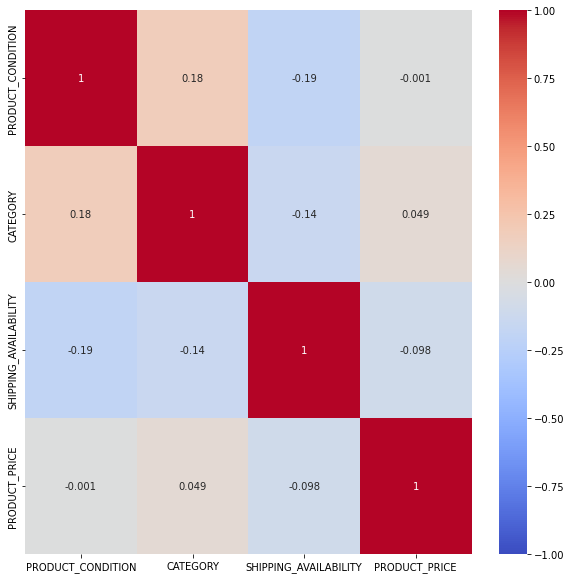

In [77]:

plt.figure(figsize=(10,10))
sns.heatmap(main_df.corr(), vmin=-1, cmap="coolwarm", annot=True)


#### Extra

<AxesSubplot:>

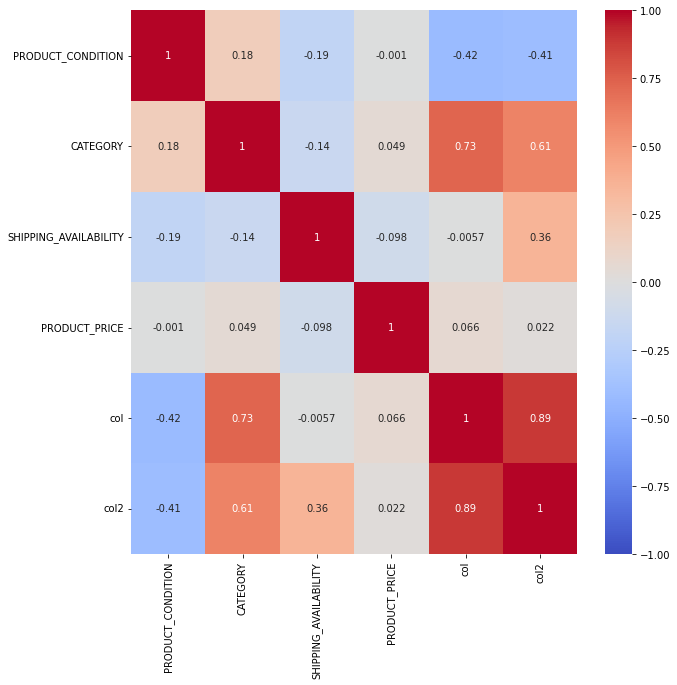

In [78]:
col = main_df["CATEGORY"] / main_df["PRODUCT_CONDITION"]
col_2 = col * (1+ (main_df["SHIPPING_AVAILABILITY"] * 1))
main_df["col"] = col
main_df["col2"] = col_2

plt.figure(figsize=(10,10))
sns.heatmap(main_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

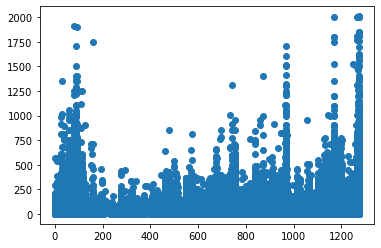

In [79]:
y = main_df.iloc[:,3].to_numpy().astype(np.float64)
x = main_df.iloc[:,1].to_numpy().astype(np.float64)



plt.scatter(x,y)
plt.show()

In [80]:
main_df

,PRODUCT_CONDITION,CATEGORY,SHIPPING_AVAILABILITY,PRODUCT_PRICE,col,col2
0,4,28,0,20.0,7.000000,7.000000
1,3,95,1,15.0,31.666667,63.333333
2,1,676,0,8.0,676.000000,676.000000
3,1,1264,0,31.0,1264.000000,1264.000000
4,3,916,0,8.0,305.333333,305.333333
...,...,...,...,...,...,...
1260149,3,607,0,12.0,202.333333,202.333333
1260150,1,1245,0,34.0,1245.000000,1245.000000
1260151,1,679,0,99.0,679.000000,679.000000
1260152,1,78,0,9.0,78.000000,78.000000
